
Bad key text.latex.preview in file C:\Users\dell\anaconda3\envs\myPymatgen\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\dell\anaconda3\envs\myPymatgen\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\dell\anaconda3\envs\myPymatgen\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is save

[ICDD] Total (V-Nb-Mn) - O:  868
[ICDD] after remove Deleted: 785
[ICDD] after remove Hypothetical: 780
[ICDD] after remove Blank/Low-Precision: 658
[ICDD] after remove non-Ambient: 559
[ICDD] after merging cross-ref entries 179


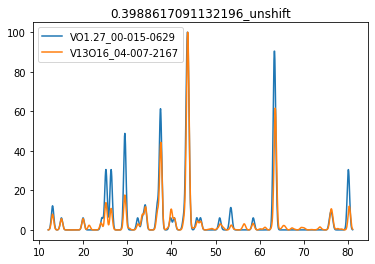

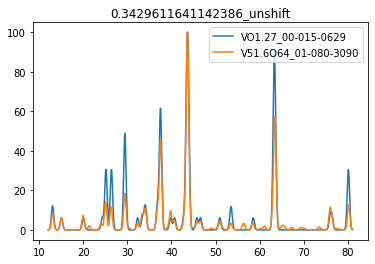

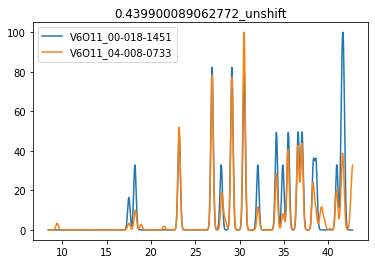

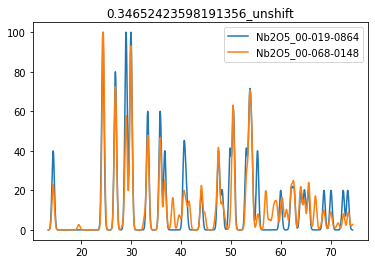

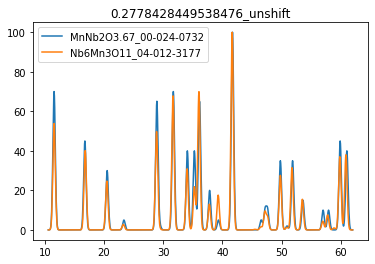

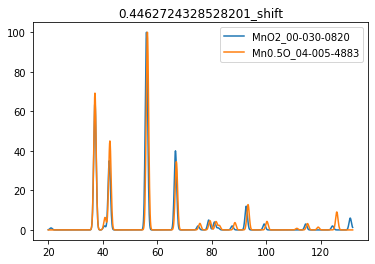

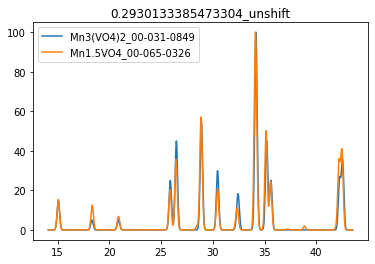

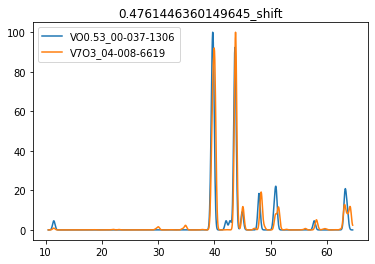

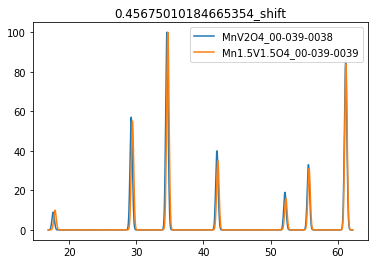

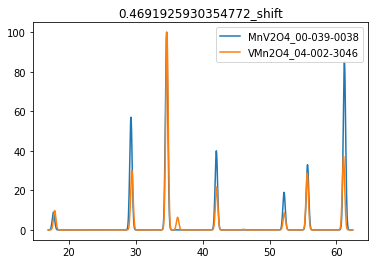

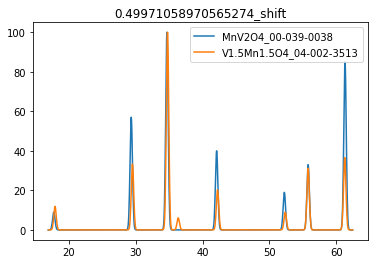

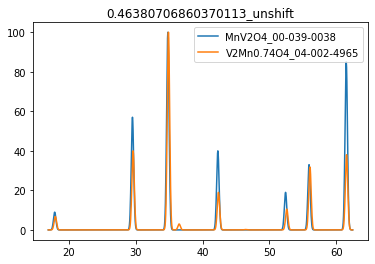

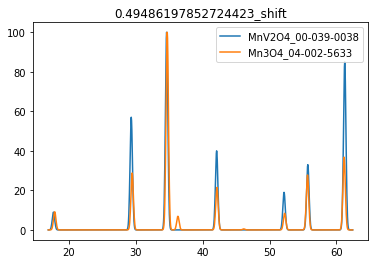

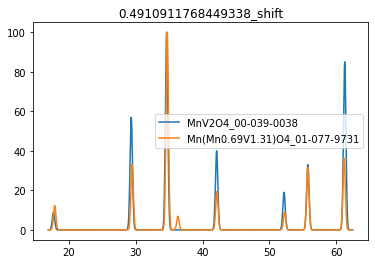

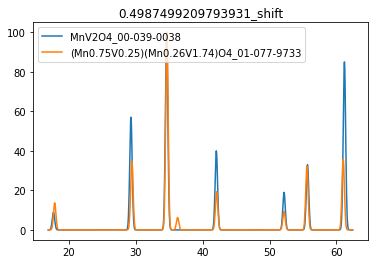

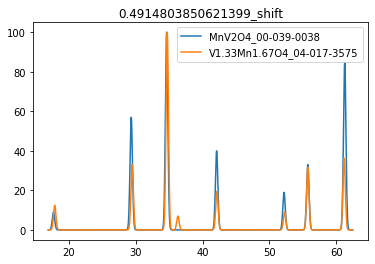

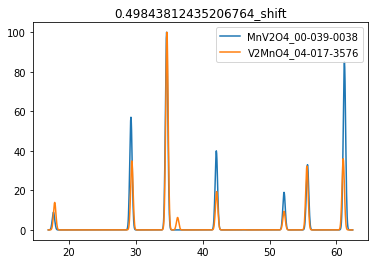

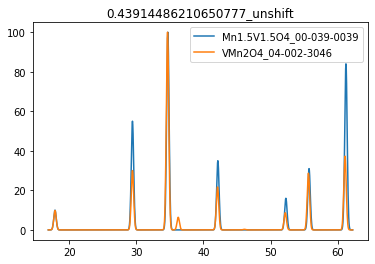

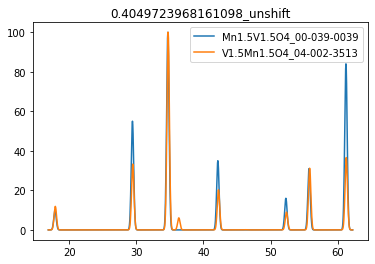

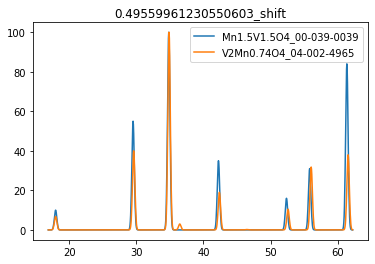

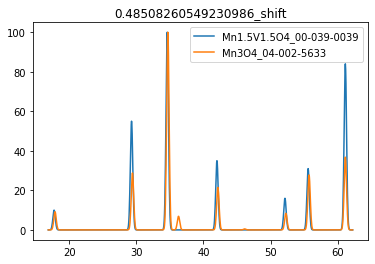

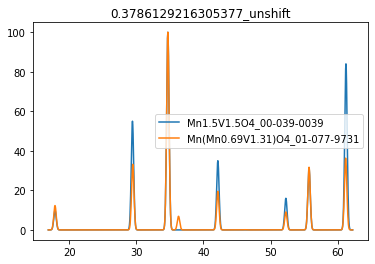

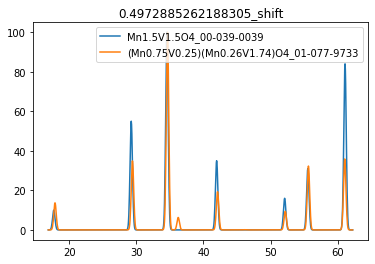

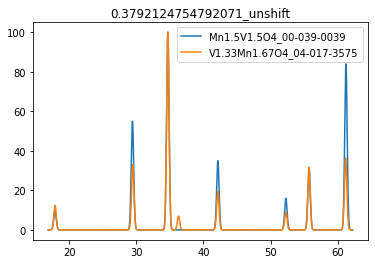

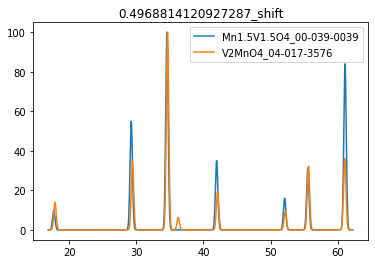

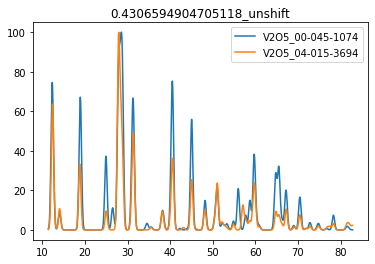

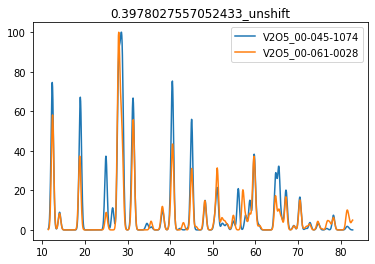

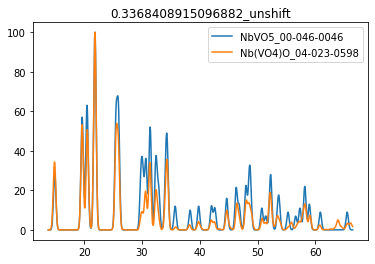

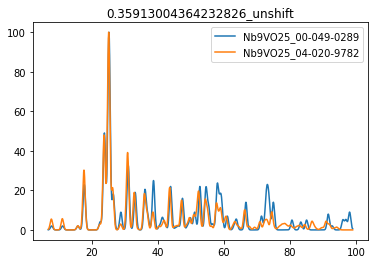

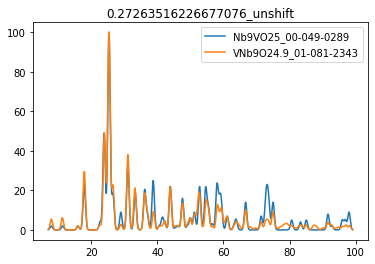

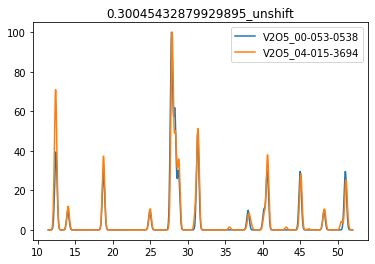

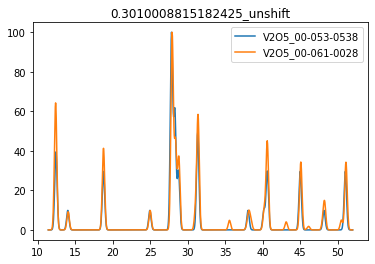

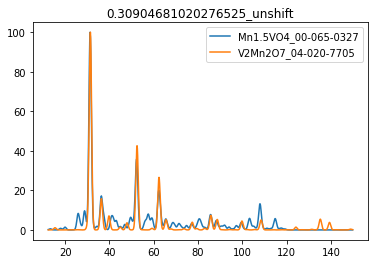

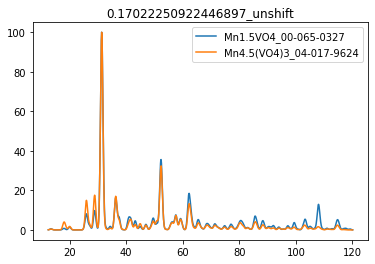

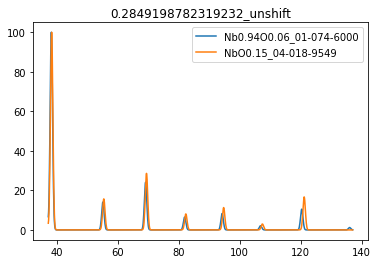

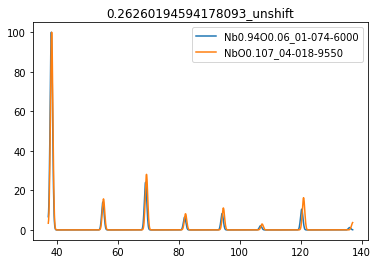

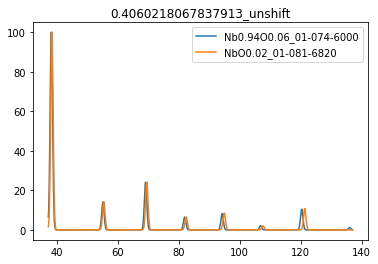

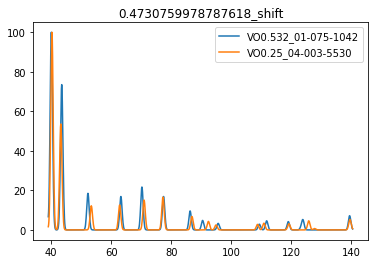

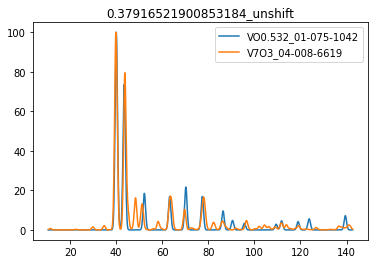

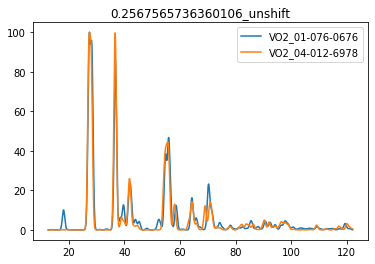

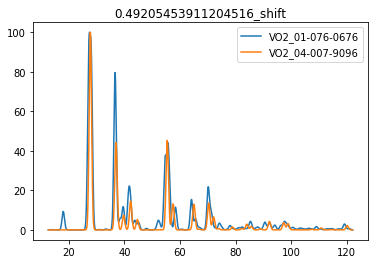

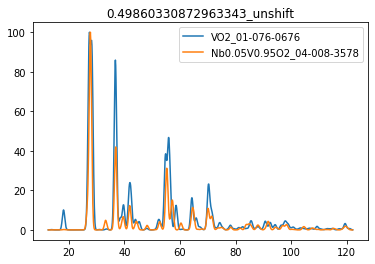

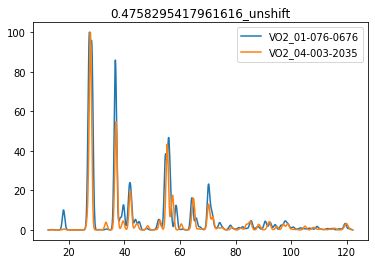

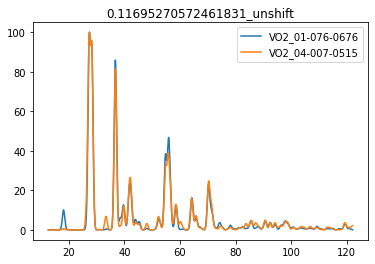

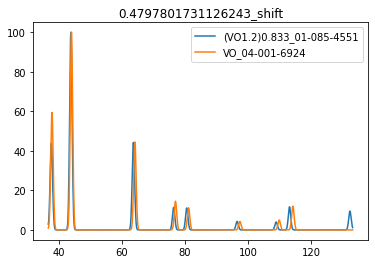

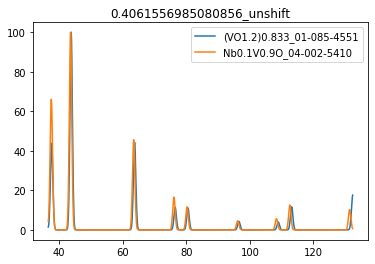

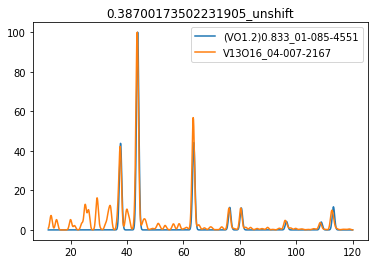

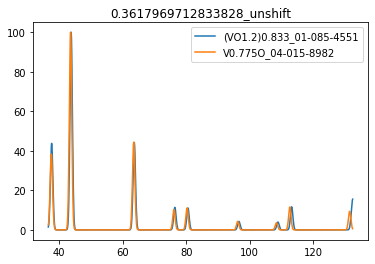

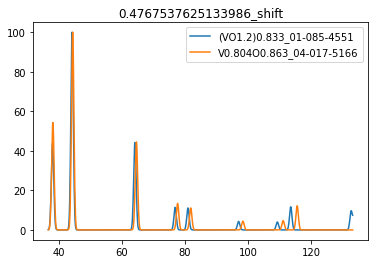

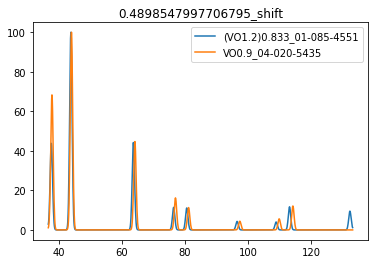

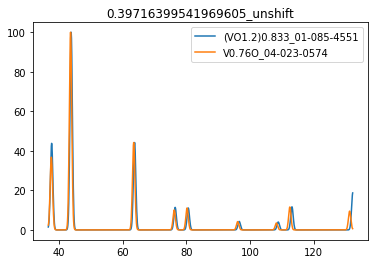

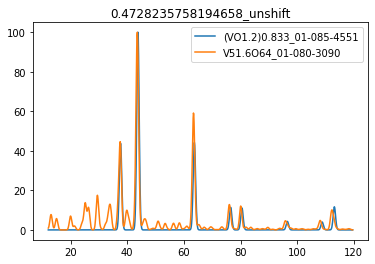

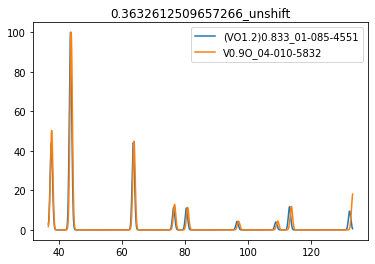

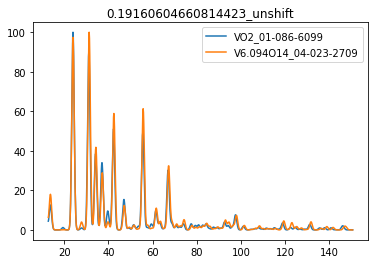

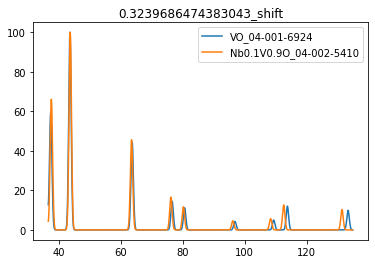

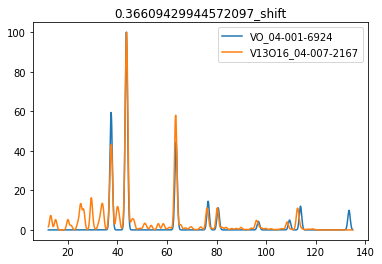

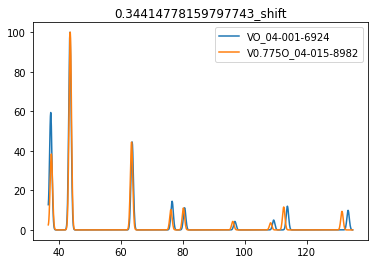

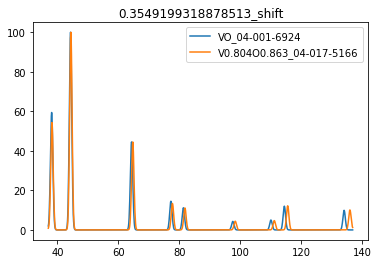

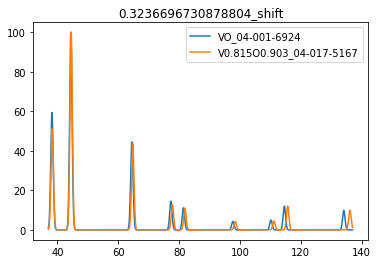

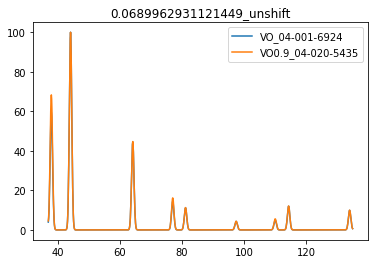

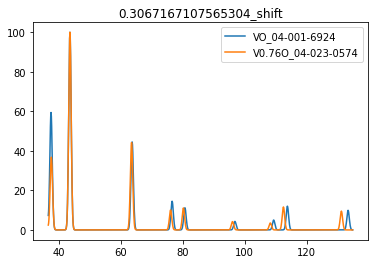

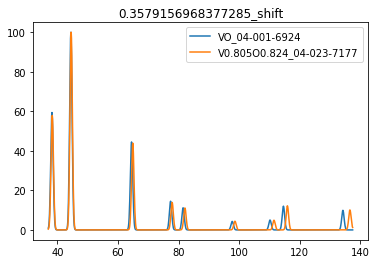

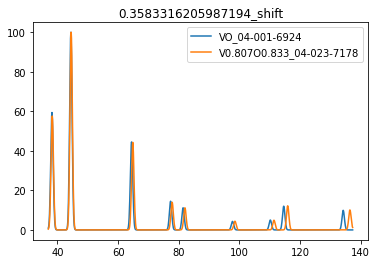

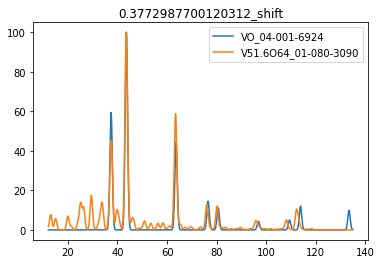

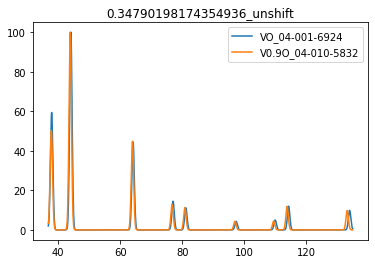

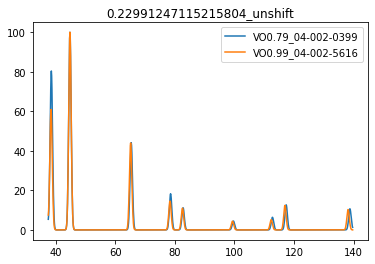

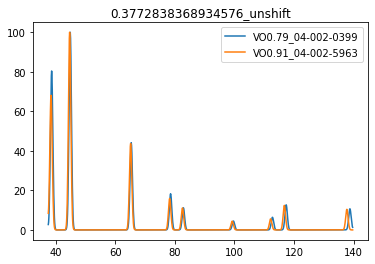

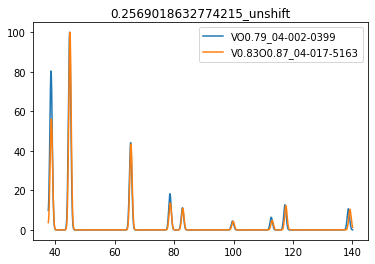

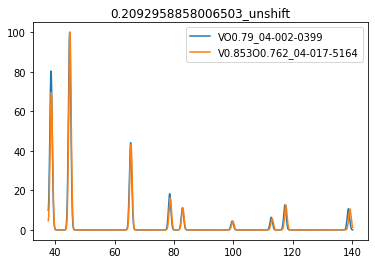

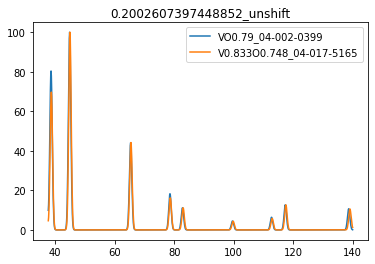

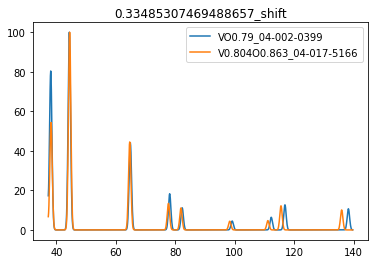

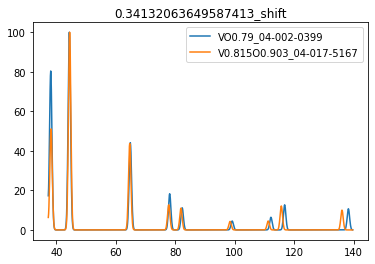

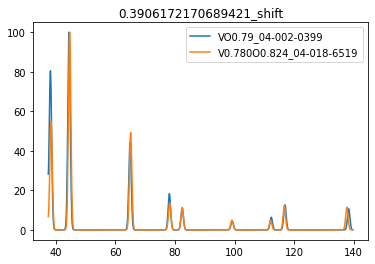

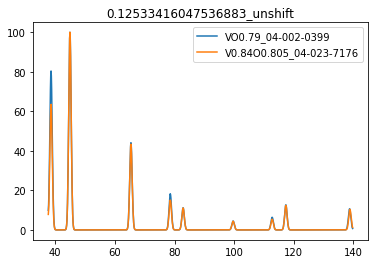

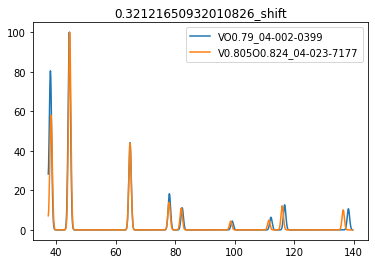

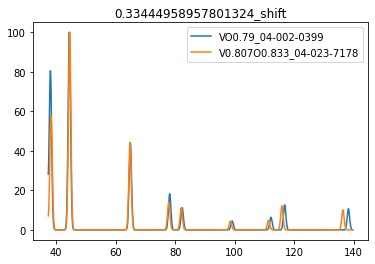

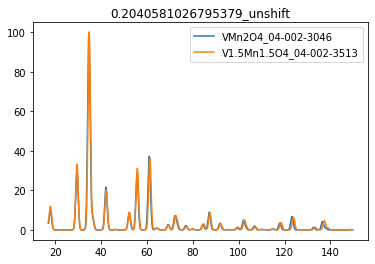

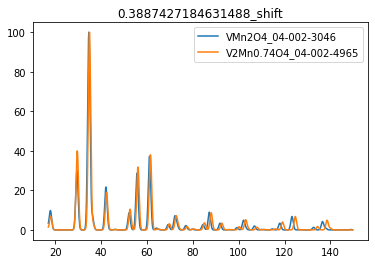

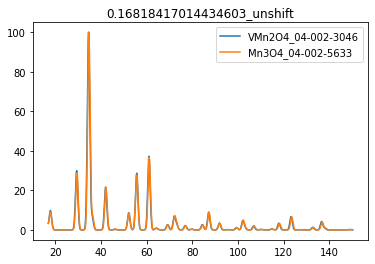

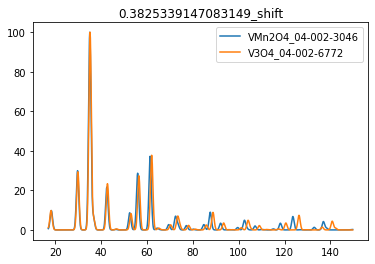

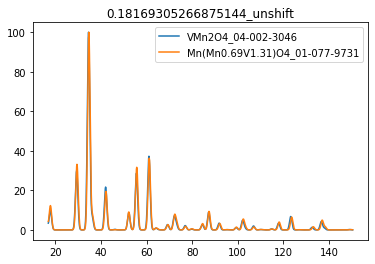

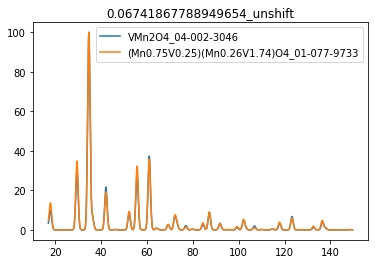

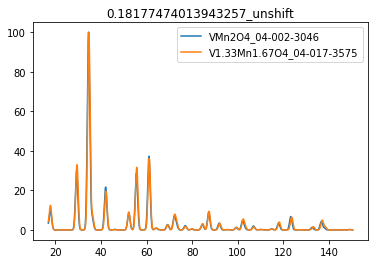

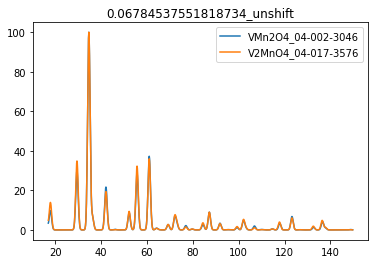

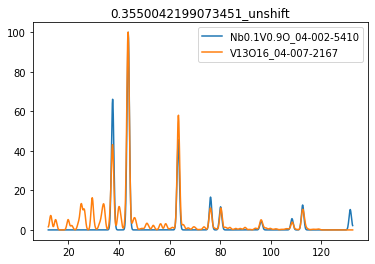

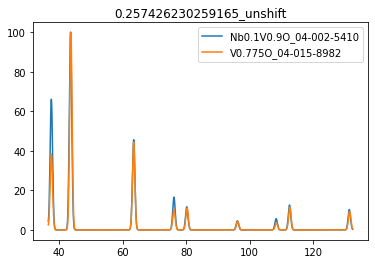

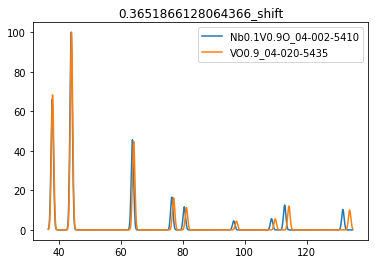

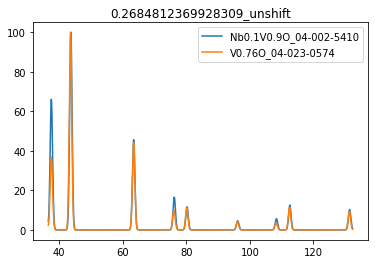

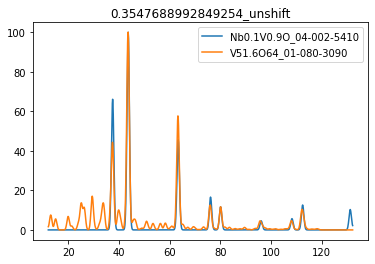

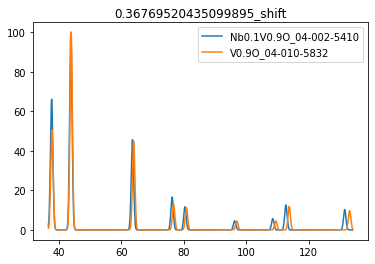

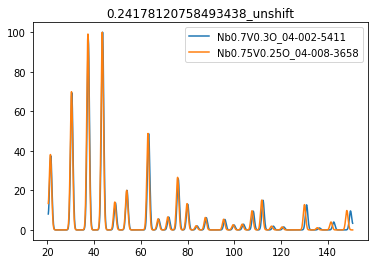

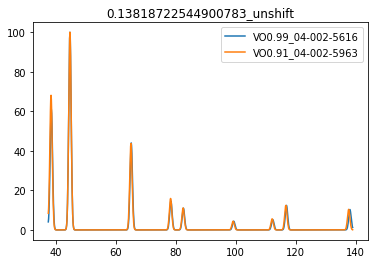

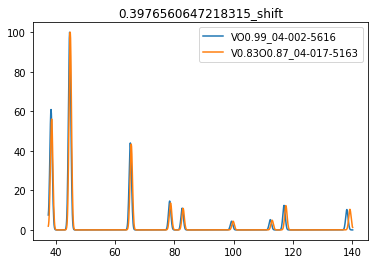

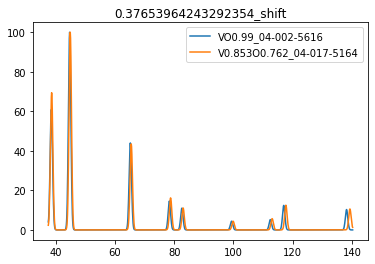

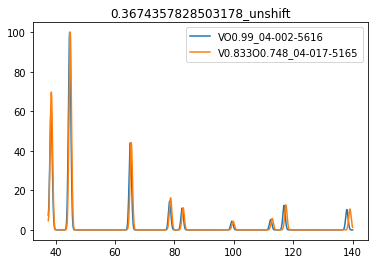

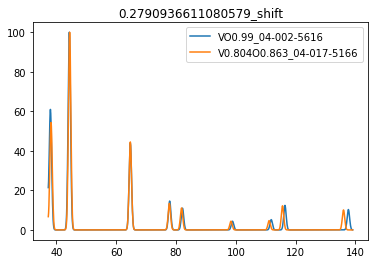

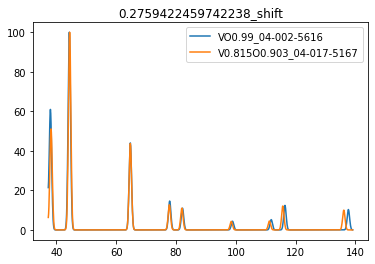

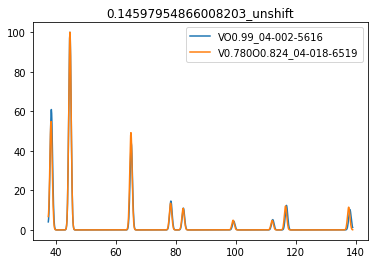

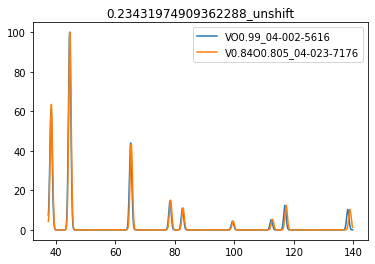

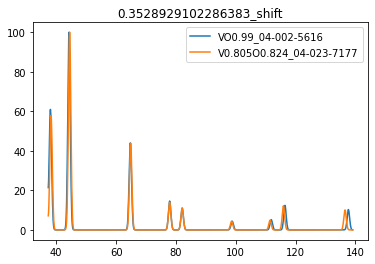

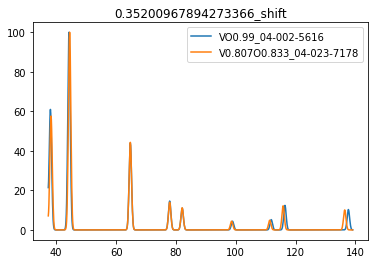

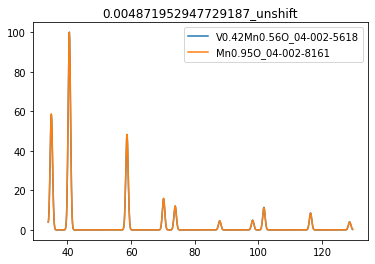

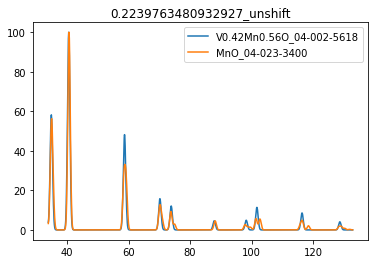

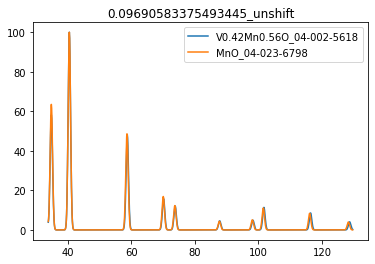

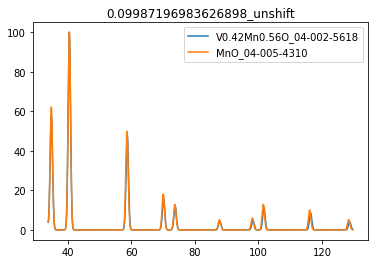

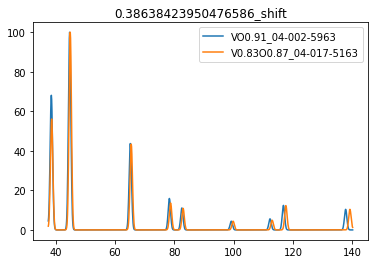

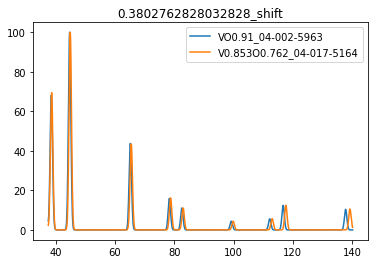

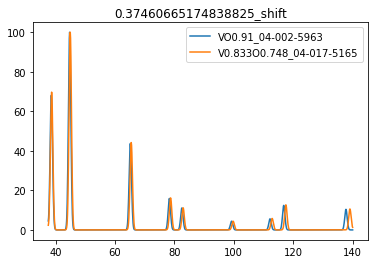

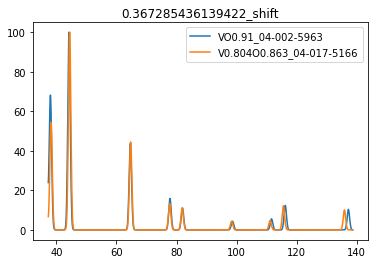

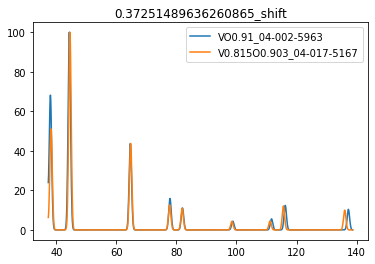

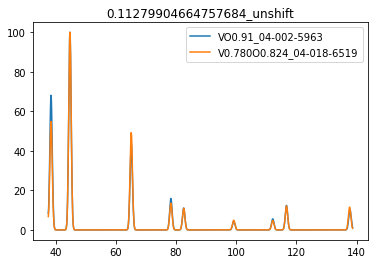

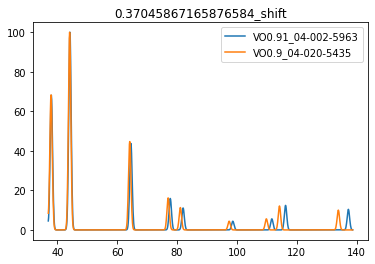

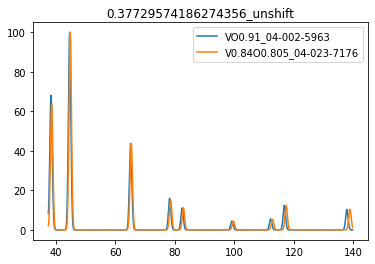

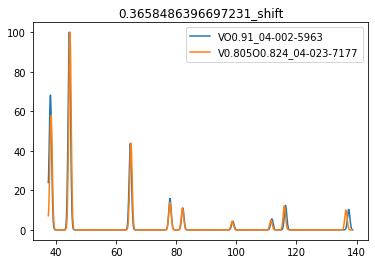

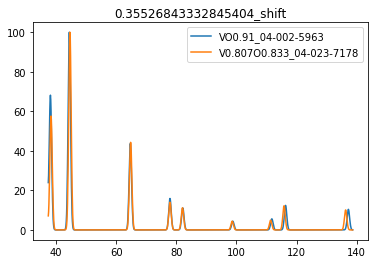

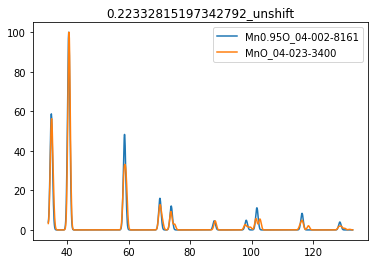

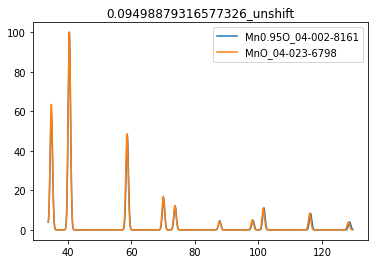

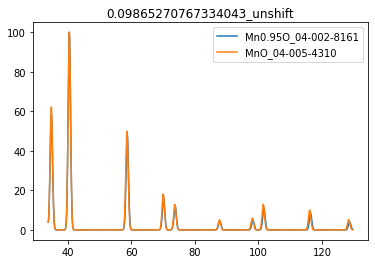

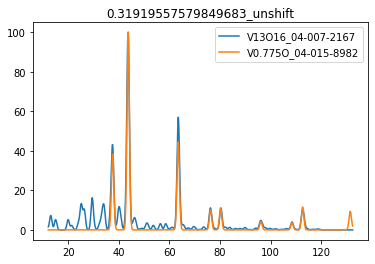

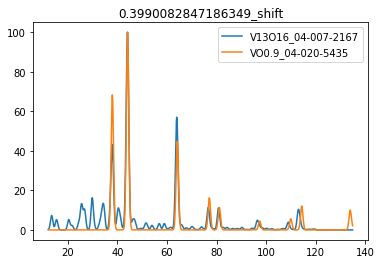

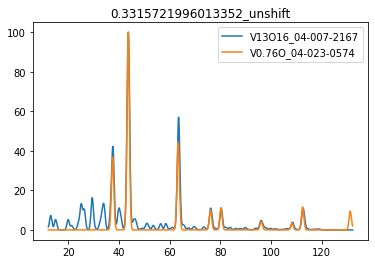

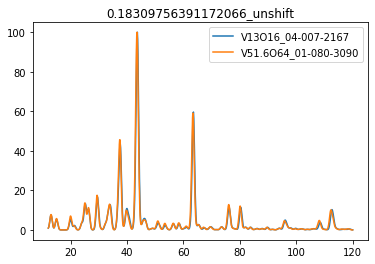

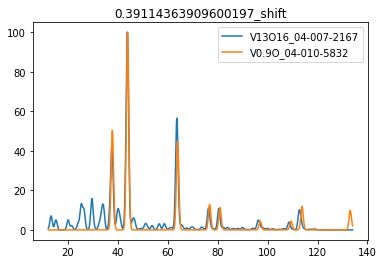

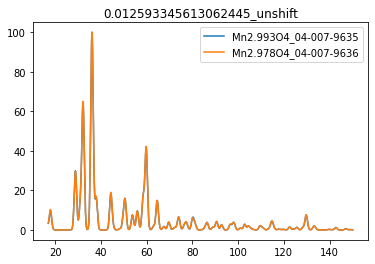

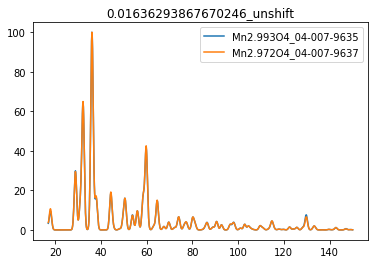

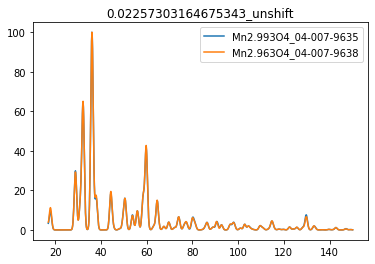

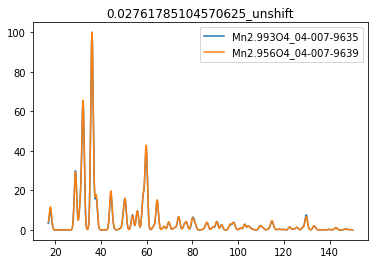

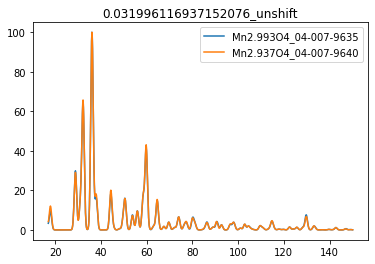

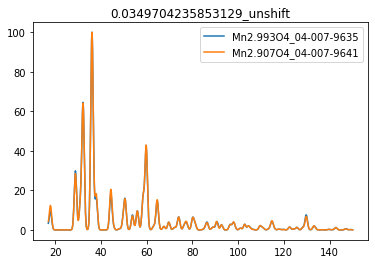

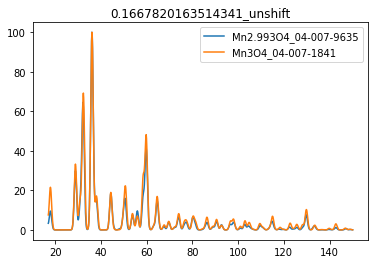

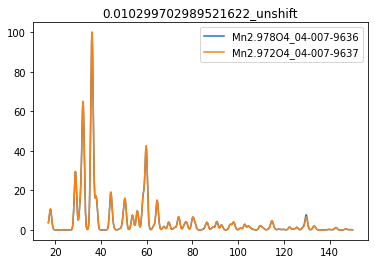

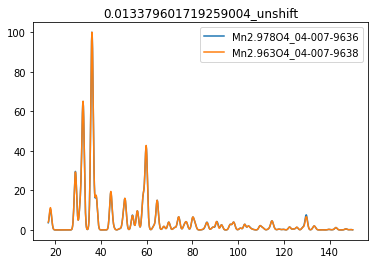

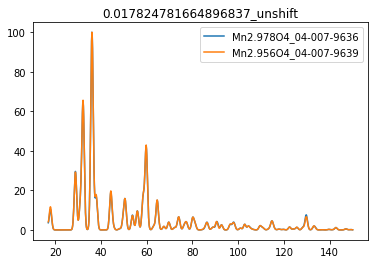

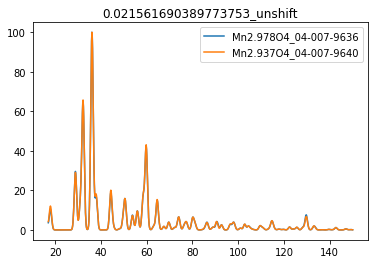

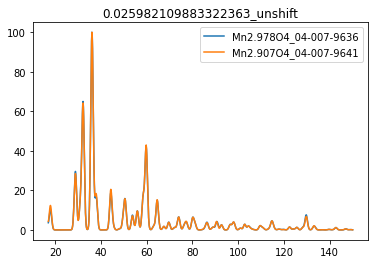

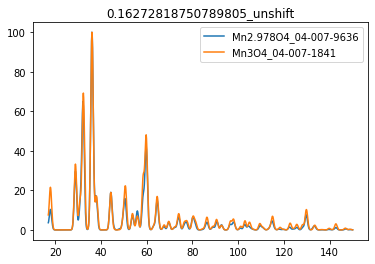

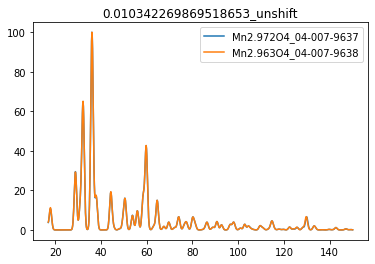

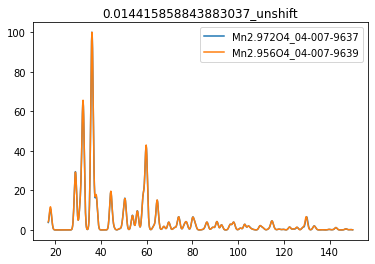

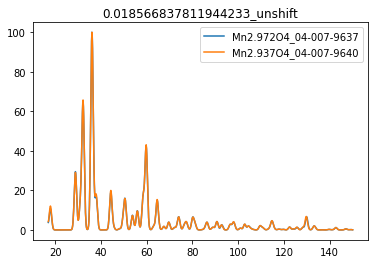

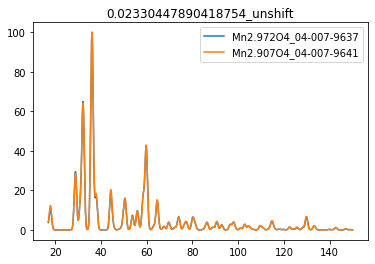

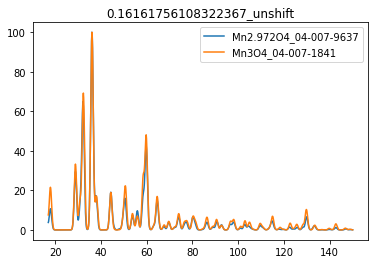

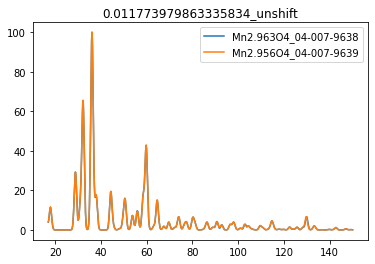

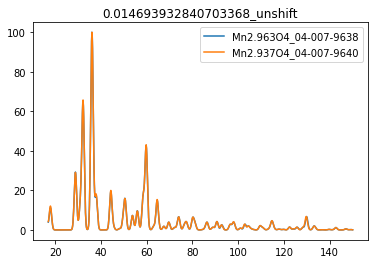

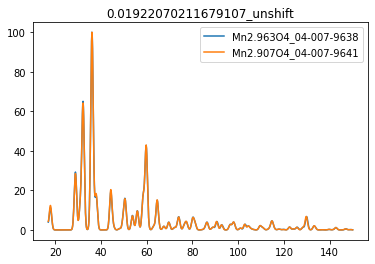

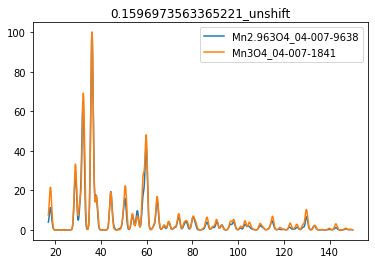

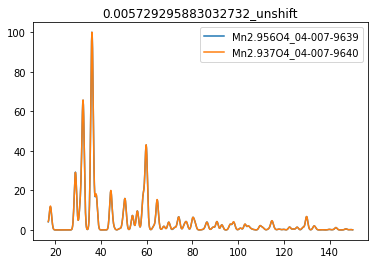

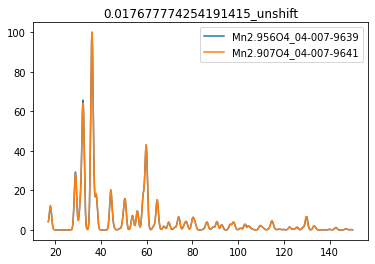

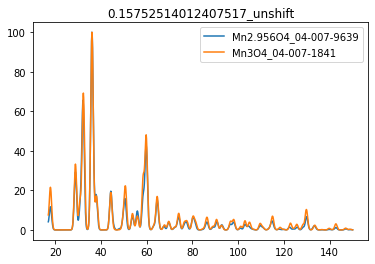

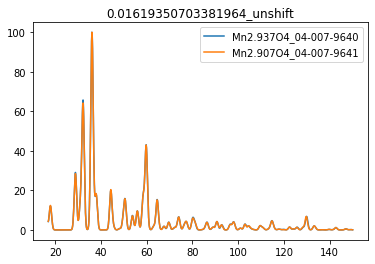

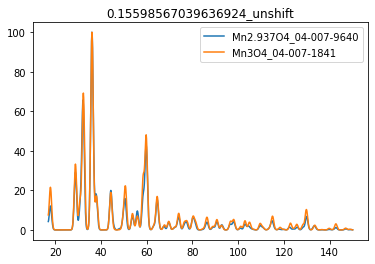

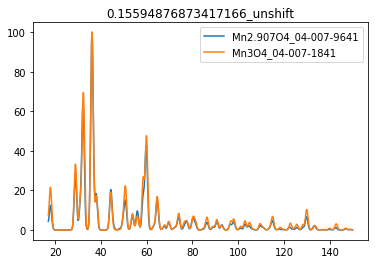

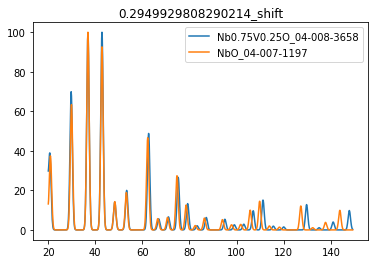

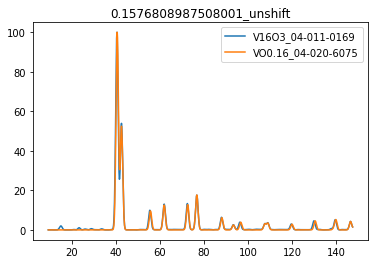

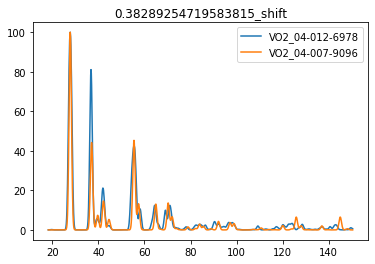

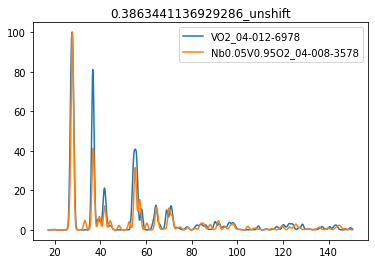

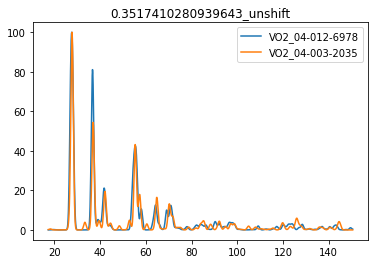

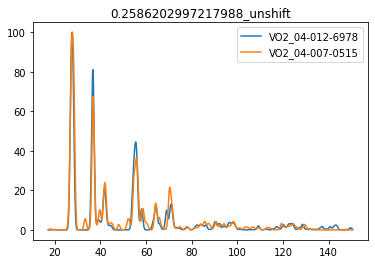

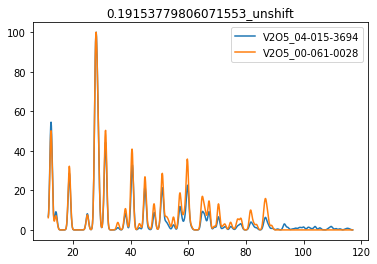

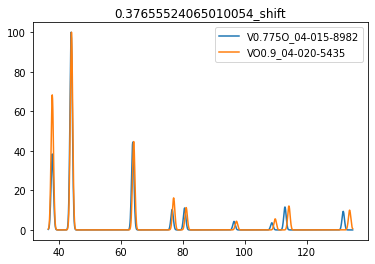

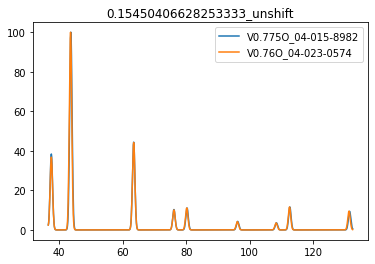

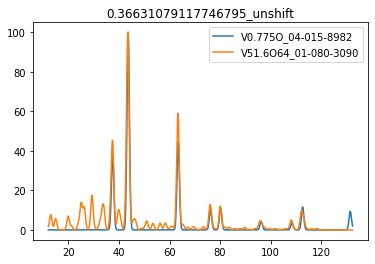

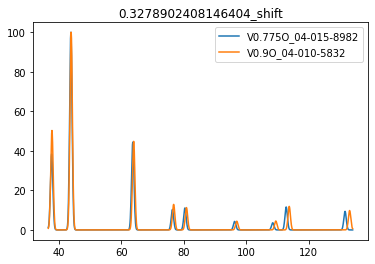

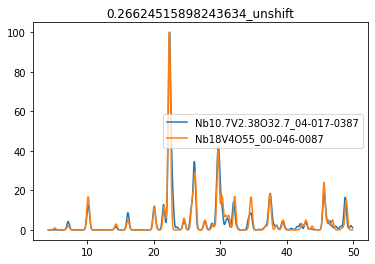

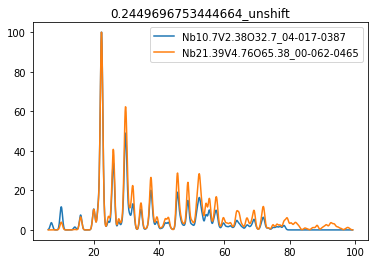

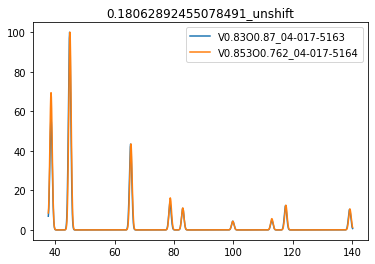

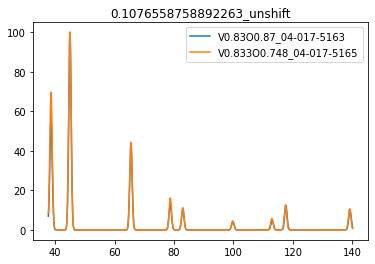

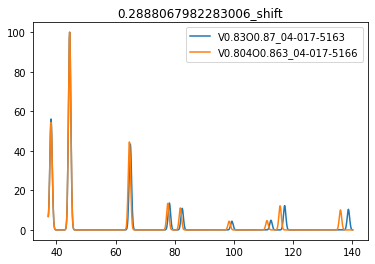

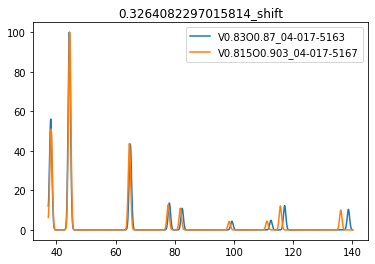

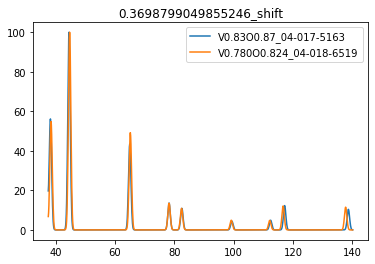

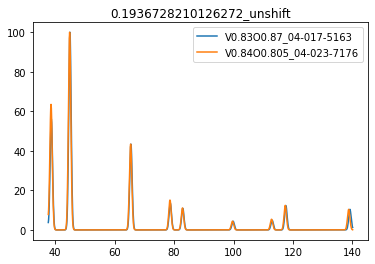

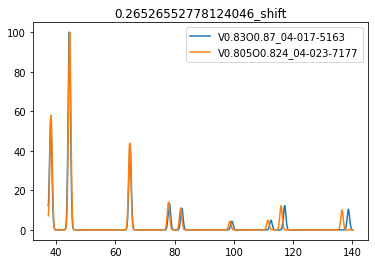

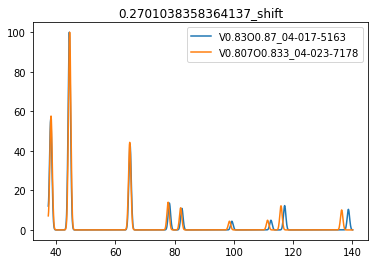

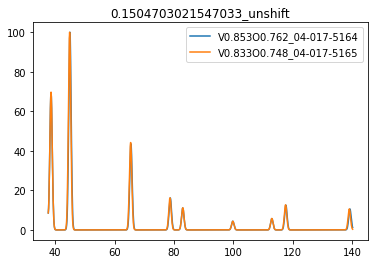

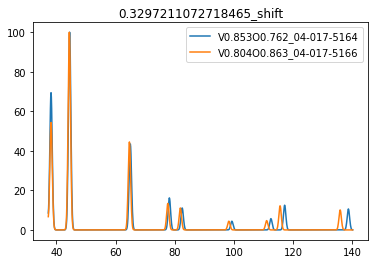

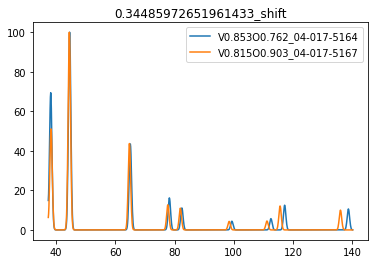

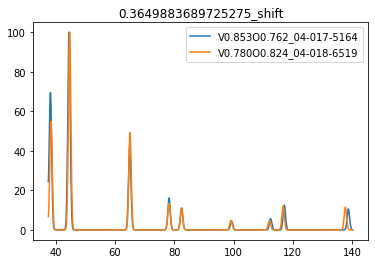

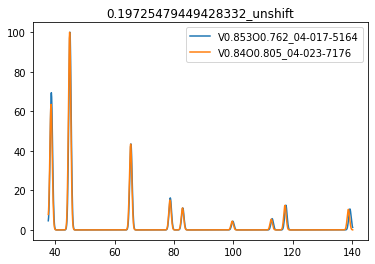

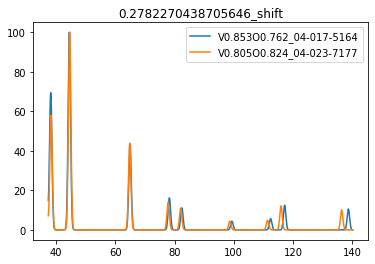

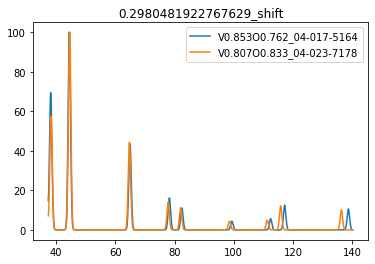

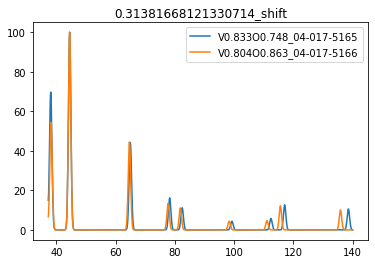

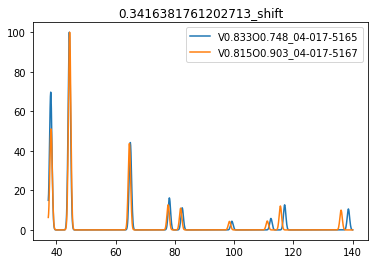

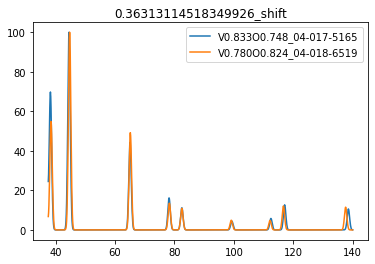

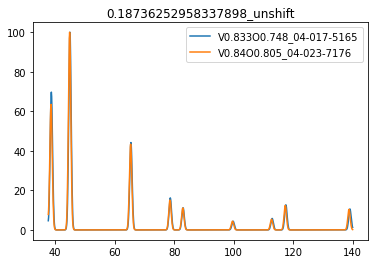

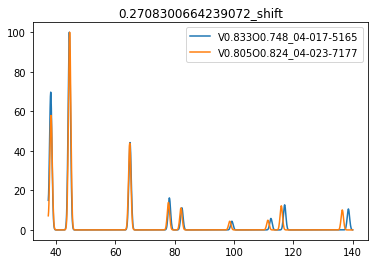

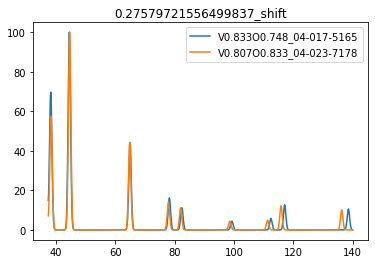

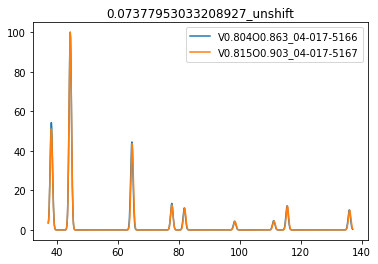

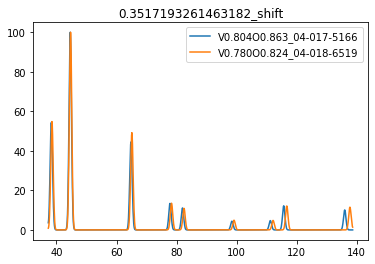

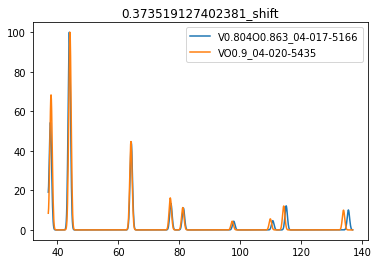

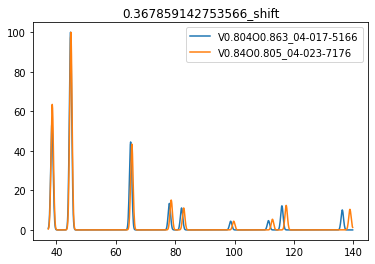

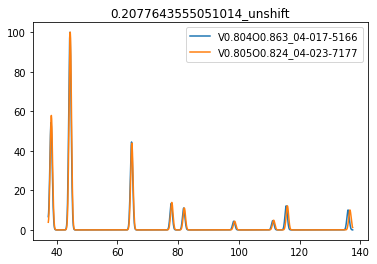

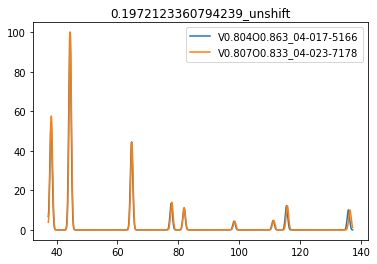

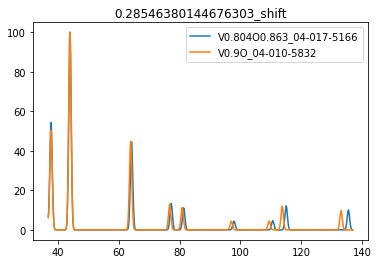

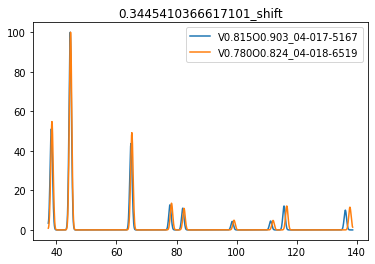

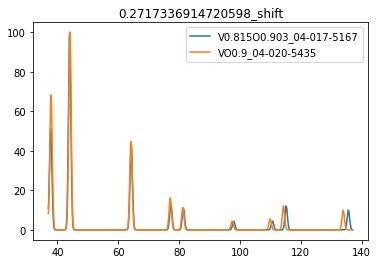

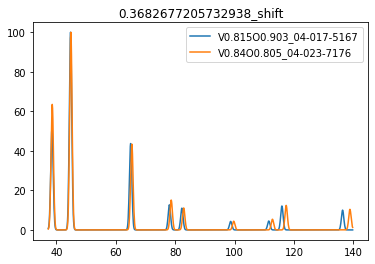

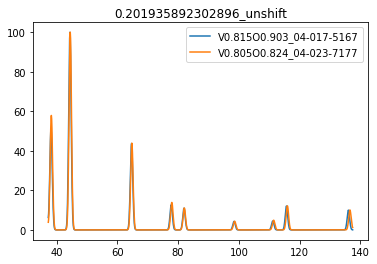

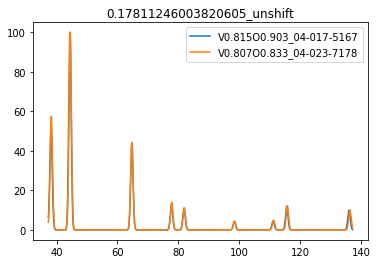

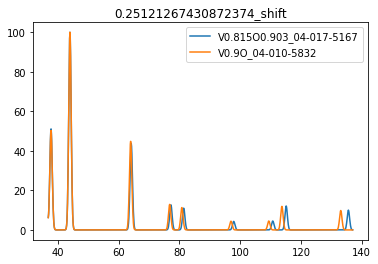

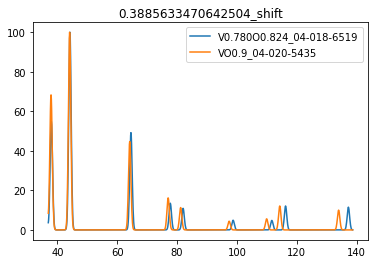

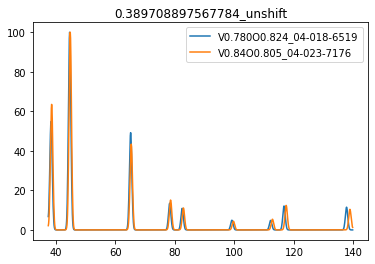

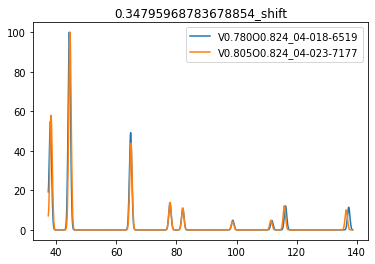

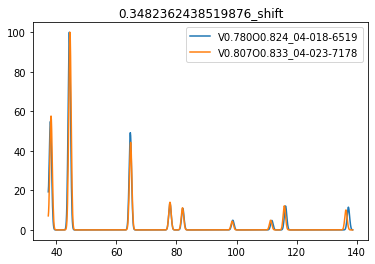

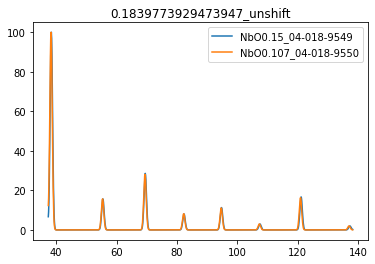

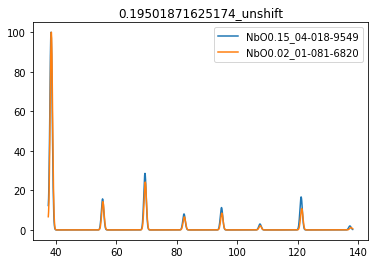

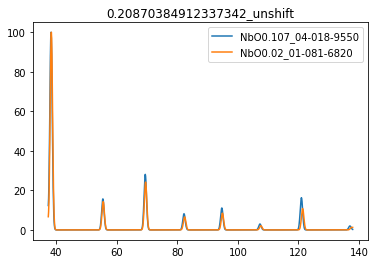

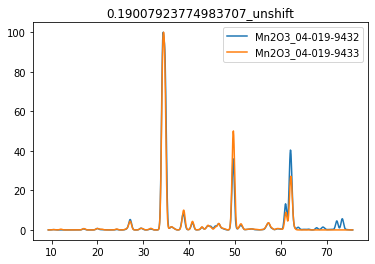

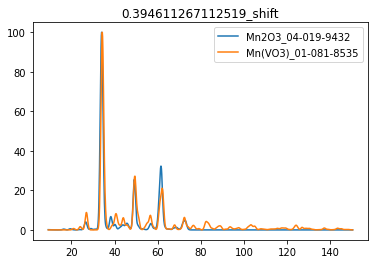

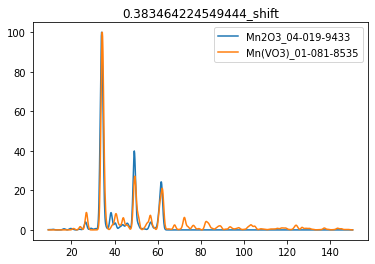

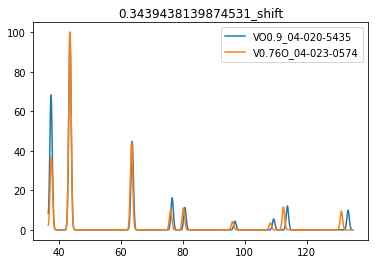

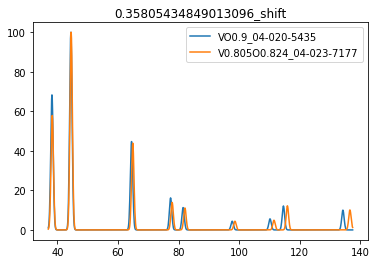

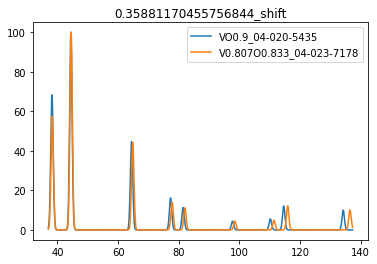

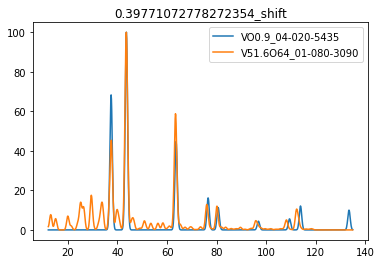

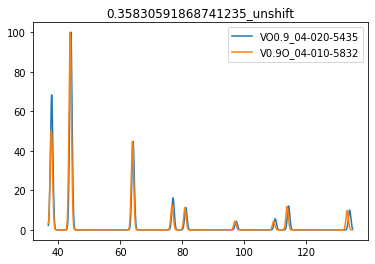

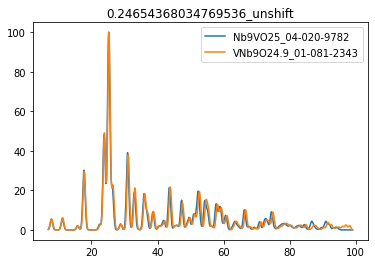

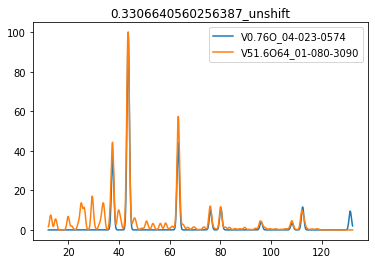

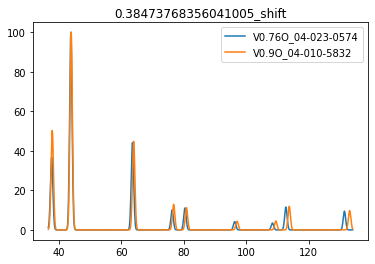

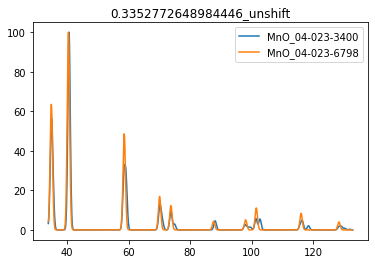

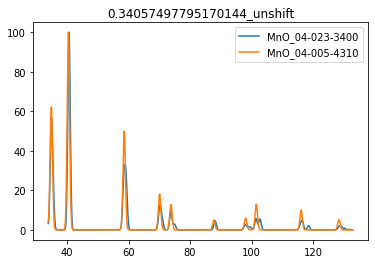

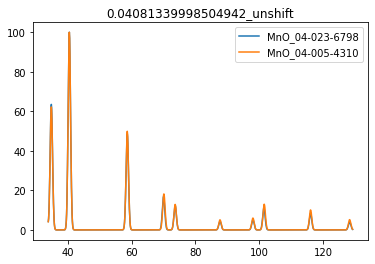

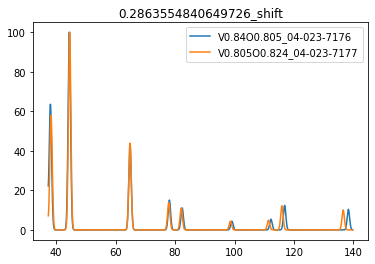

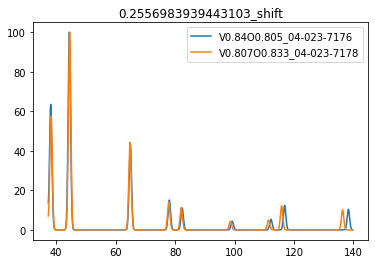

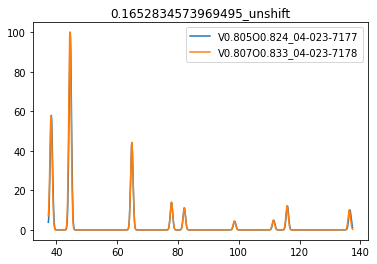

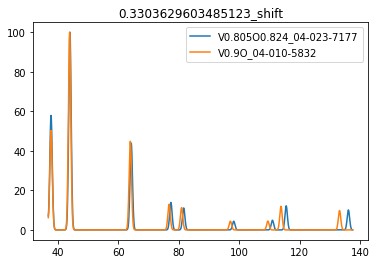

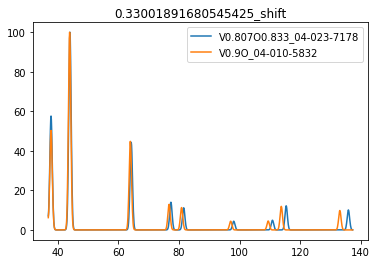

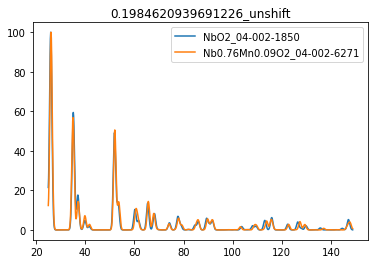

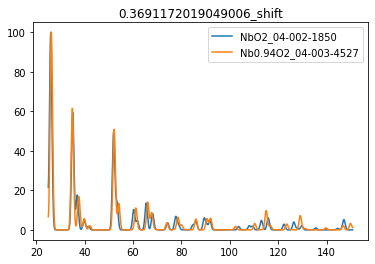

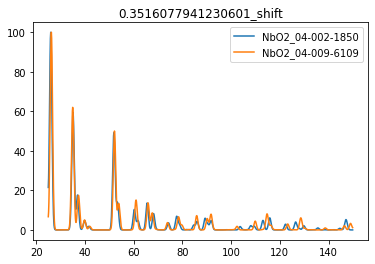

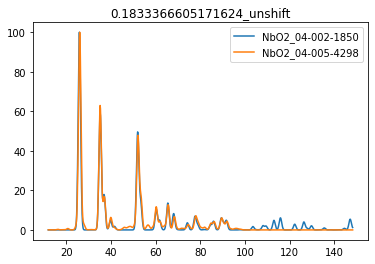

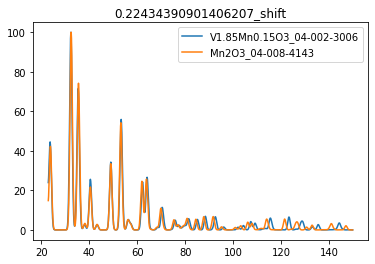

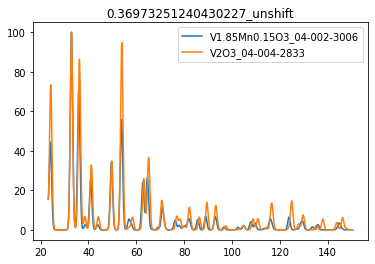

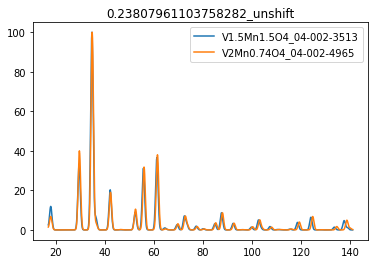

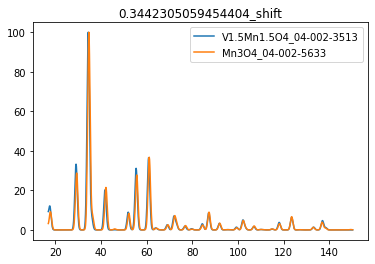

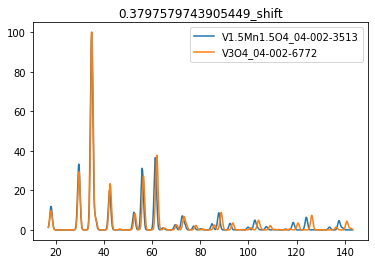

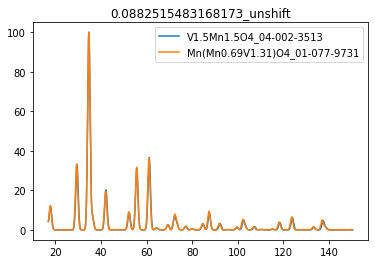

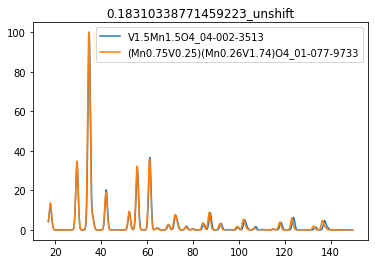

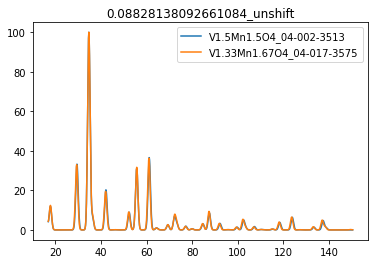

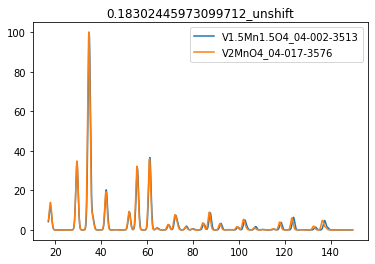

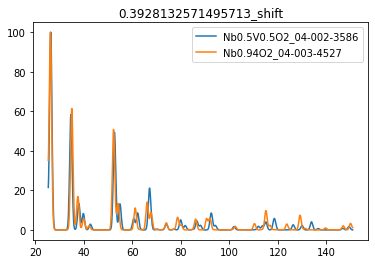

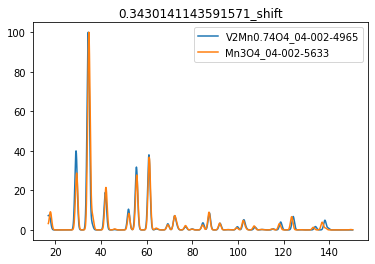

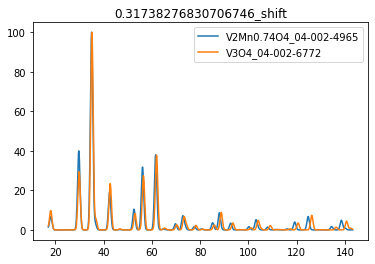

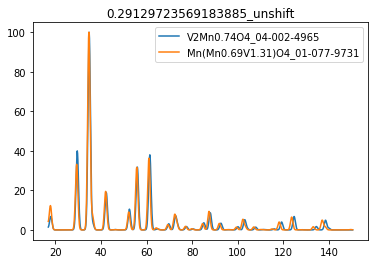

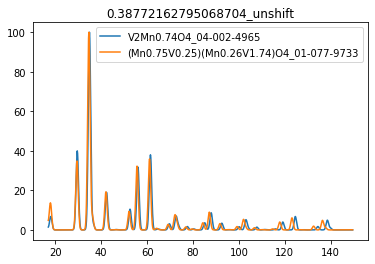

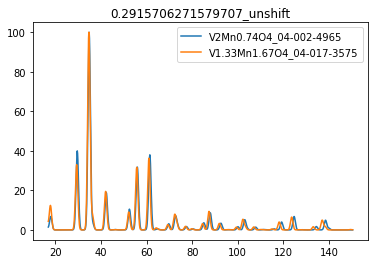

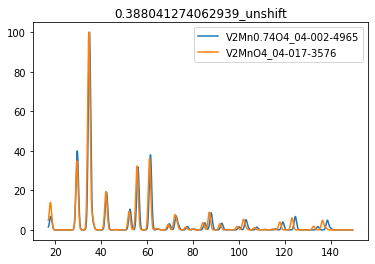

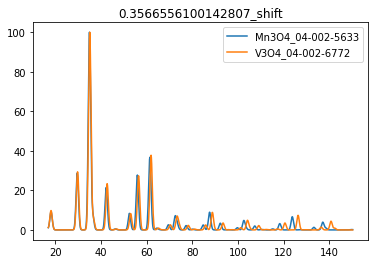

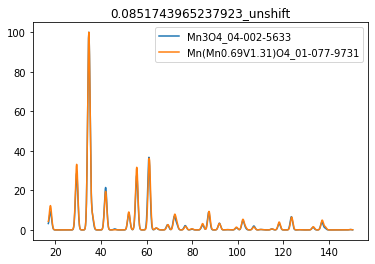

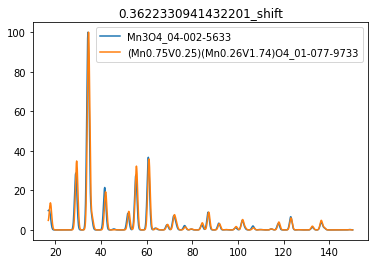

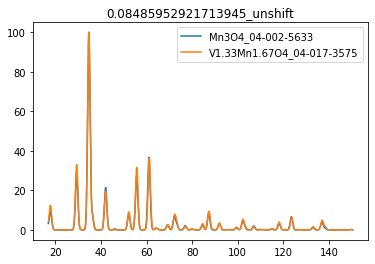

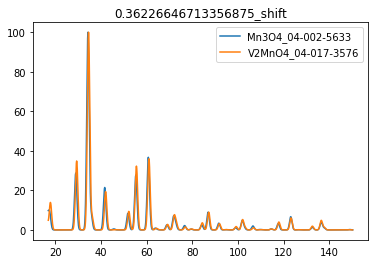

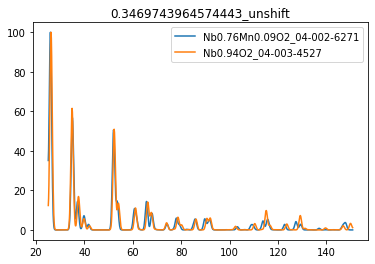

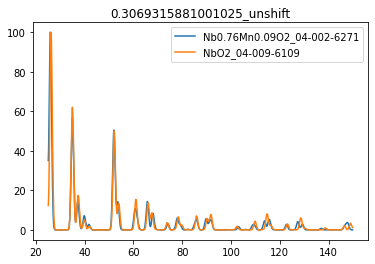

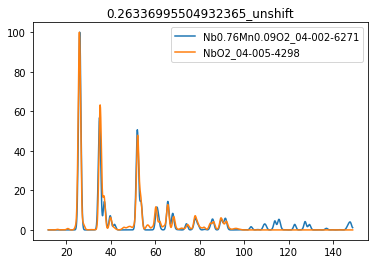

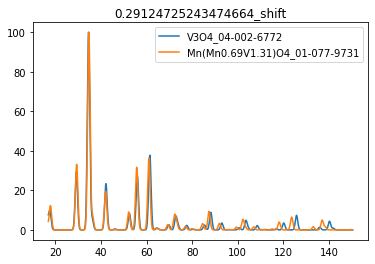

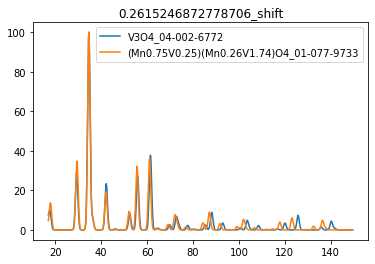

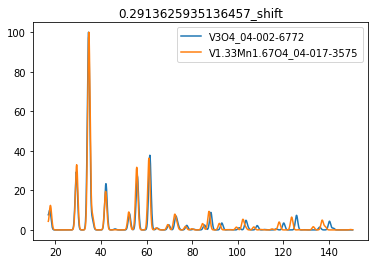

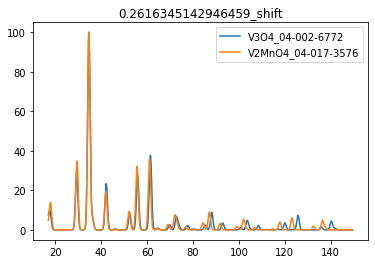

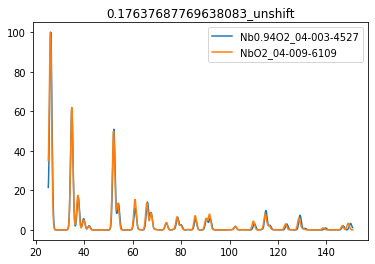

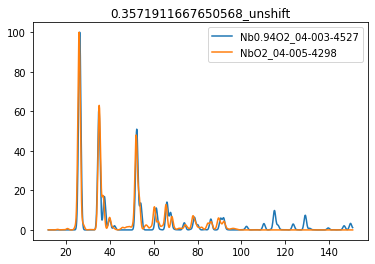

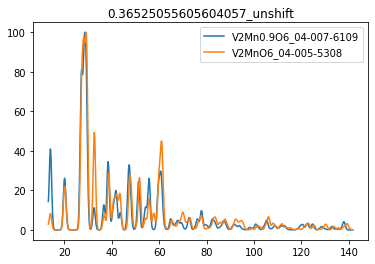

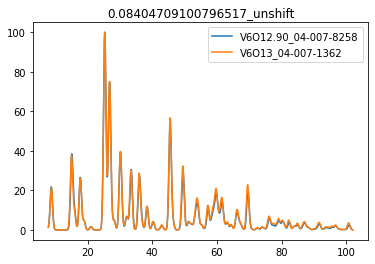

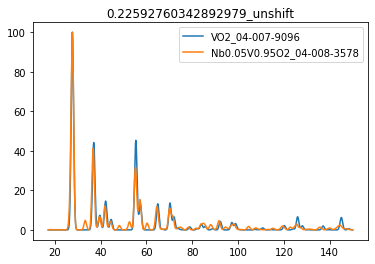

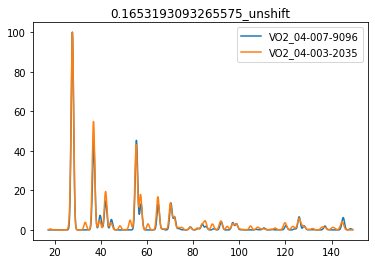

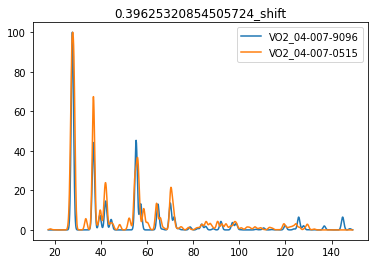

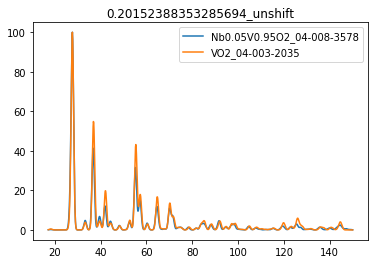

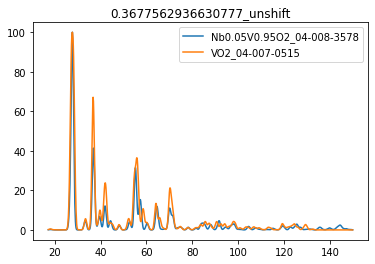

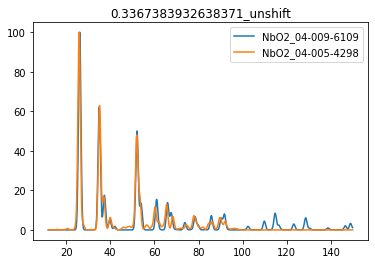

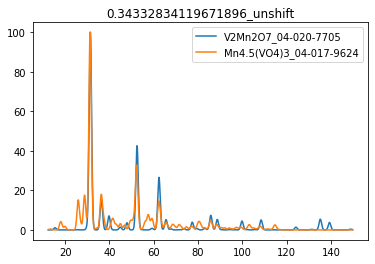

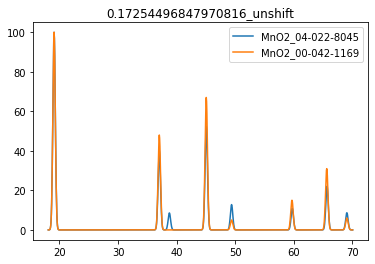

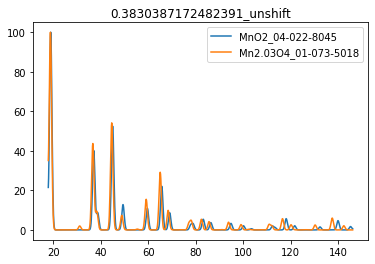

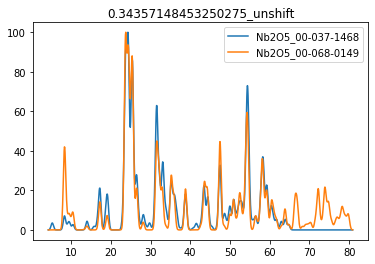

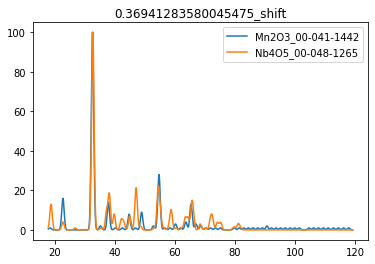

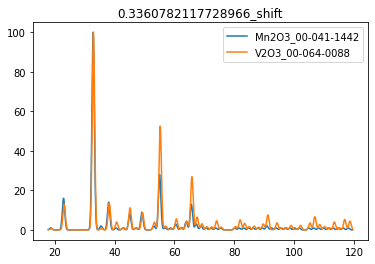

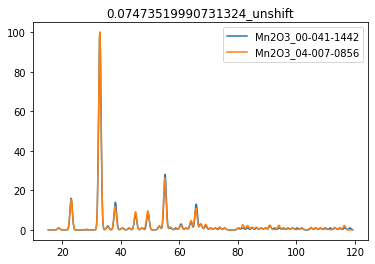

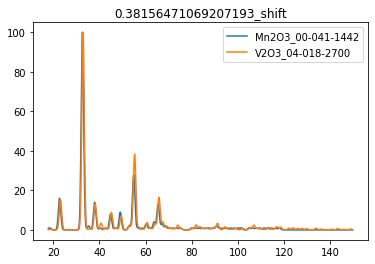

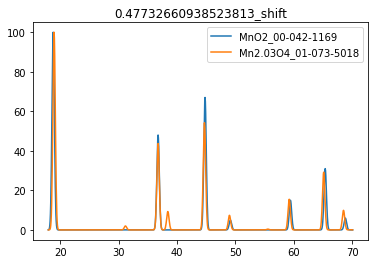

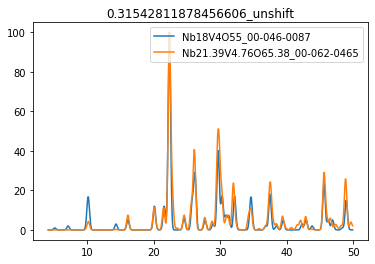

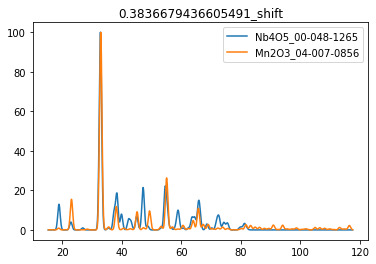

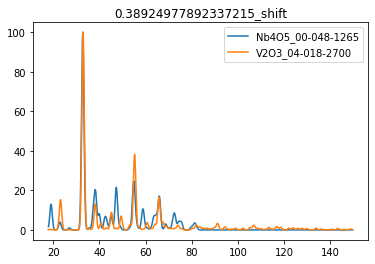

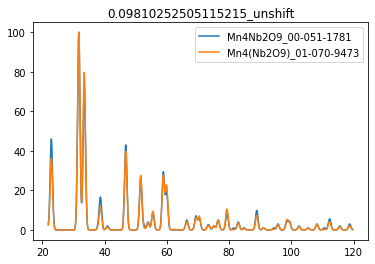

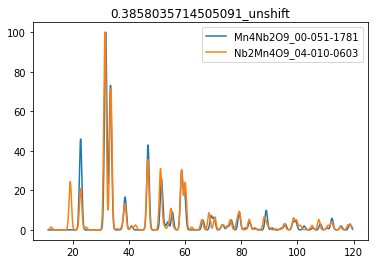

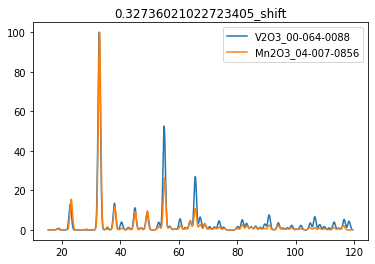

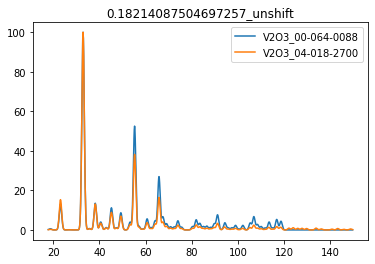

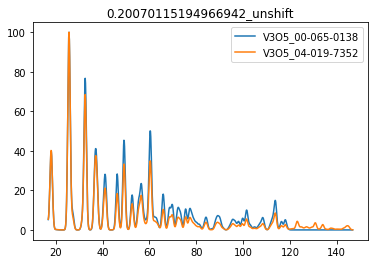

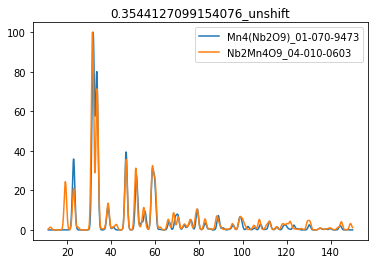

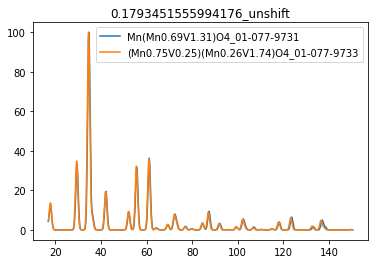

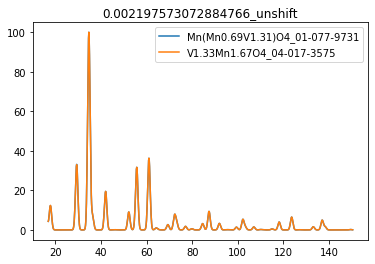

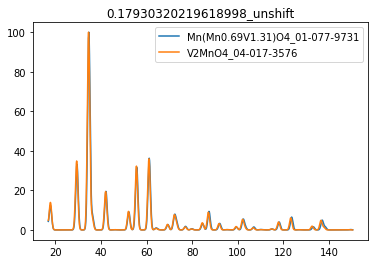

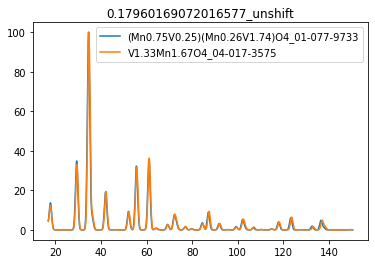

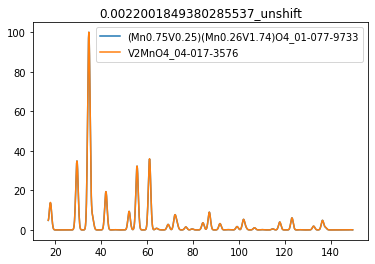

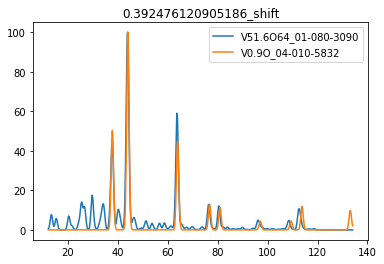

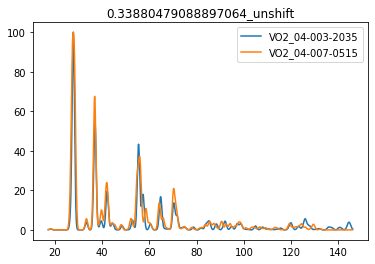

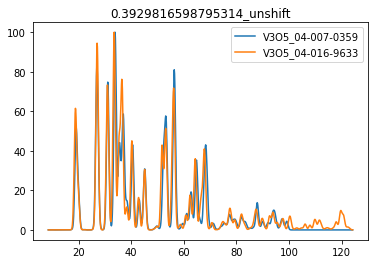

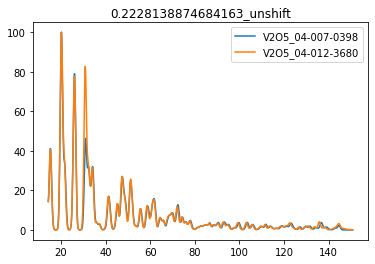

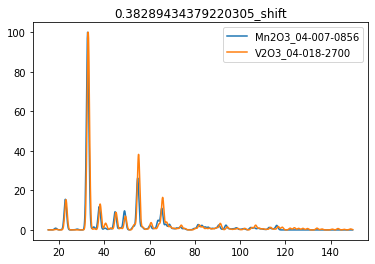

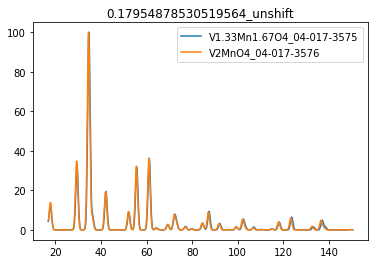

0 (122, '01-080-3090')
(122, '04-010-5832')
(112, '04-001-6924')
(112, '04-002-0399')
(112, '04-002-5410')
(112, '04-002-5616')
(112, '04-002-5963')
(112, '04-007-2167')
(112, '04-015-8982')
(112, '04-017-5163')
(112, '04-017-5164')
(112, '04-017-5165')
(112, '04-017-5166')
(112, '04-017-5167')
(112, '04-018-6519')
(112, '04-020-5435')
(112, '04-023-0574')
(112, '04-023-7176')
(112, '04-023-7177')
(112, '04-023-7178')
(12, '00-015-0629')
(12, '01-085-4551')
1 (111, '04-008-0733')
(12, '00-018-1451')
2 (122, '00-068-0148')
(12, '00-019-0864')
3 (112, '04-012-3177')
(12, '00-024-0732')
4 (112, '04-005-4883')
(12, '00-030-0820')
5 (122, '00-065-0326')
(12, '00-031-0849')
6 (112, '04-008-6619')
(12, '00-037-1306')
(12, '01-075-1042')
7 (122, '01-077-9731')
(122, '01-077-9733')
(122, '04-017-3575')
(122, '04-017-3576')
(112, '04-002-3046')
(112, '04-002-3513')
(112, '04-002-4965')
(112, '04-002-5633')
(112, '04-002-6772')
(12, '00-039-0038')
(12, '00-039-0039')
8 (122, '00-061-0028')
(112, 

KeyboardInterrupt: 

In [1]:
import warnings
warnings.filterwarnings('ignore')
import json
import pandas as pd
from copy import deepcopy
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
import os
from monty.json import MontyEncoder
from pymatgen.core import Element

from phasemapy.parser import ICDDEntry, ICDDEntryPreprocessor

chemsys = ['V', 'Nb', 'Mn']
oxide_system = True


def get_dataframe(icdd_entries, keys):
    data = {}
    for key in keys:
        data[key] = [e.as_dict()[key] for e in icdd_entries]
    df = pd.DataFrame(data)
    return df

pdfs_icdd = glob('./data/icdd/**/*.xml')
icdd_entries = [ICDDEntry.from_icdd_xml(pdf) for pdf in pdfs_icdd]
icdd_entries = [_ for _ in icdd_entries if _.name != 'O2']
icdd_entries = [_ for _ in icdd_entries if _.name != 'O3']
icdd_entries = [_ for _ in icdd_entries if _.name != '(O3)']
icdd_entries = [_ for _ in icdd_entries if _.name != '(O2)']
precess = ICDDEntryPreprocessor(deepcopy(icdd_entries), chemsys, oxide_system)


pdfs_icsd = glob('./data/icsd/*.cif')
icsd_entries = [ICDDEntry.from_icsd_cif(pdf) for pdf in pdfs_icsd]
precess_icsd = ICDDEntryPreprocessor(deepcopy(icsd_entries), chemsys, oxide_system)
precess_icsd.get_xrd()
precess_icsd.process_frac_name()
precess_icsd.process_disorder()
icsd_entries = precess_icsd.entries

print('[ICDD] Total (V-Nb-Mn) - O: ', len(icdd_entries))  # Total

icdd_entries = [_ for _ in icdd_entries if _.status != 'Deleted']
print('[ICDD] after remove Deleted:', len(icdd_entries))

icdd_entries = [_ for _ in icdd_entries if _.quality_mark != 'Hypothetical']
print('[ICDD] after remove Hypothetical:', len(icdd_entries))

icdd_entries = [_ for _ in icdd_entries if _.quality_mark not in ['Blank', 'Low-Precision']]
print('[ICDD] after remove Blank/Low-Precision:', len(icdd_entries))

icdd_entries = [_ for _ in icdd_entries if _.pressure_temperature == 'Ambient']
print('[ICDD] after remove non-Ambient:', len(icdd_entries))

precess = ICDDEntryPreprocessor(deepcopy(icdd_entries), chemsys, oxide_system)


sp = [_ for _ in precess.entries if _.entry_id == '00-052-1266'][0]  # This is right Mn2V2O7 beta phase
precess.merge_by_cross_ref()
icdd_entries= precess.entries   

icdd_entries = [_ for _ in icdd_entries if  _.entry_id != '00-038-0034']


print('[ICDD] after merging cross-ref entries', len(icdd_entries))


precess = ICDDEntryPreprocessor(deepcopy(icdd_entries), chemsys, oxide_system)
groups=precess.merge_by_xrd(bin_number=1000, gaussian_filter=4, R1_cutoff=0.4, R2_cutoff=0.5, plot=True)
print('[ICDD] after merging XRD-group entries', len(precess.entries))
print('[Groups] after merging XRD-group entries', groups[0])
print('[Groups] after merging XRD-group entries', groups[1])

for e in precess.entries:
    print(e.entry_id)

s, icdd_icsd_entries = precess.merge_by_icsd(bin_number=1000, gaussian_filter=4, R_cutoff=0.55,icdd_entries=precess.entries, icsd_entries=icsd_entries)
print('[Number of substitutive entries]:', len(s))
print('[Substitutive entries] after merging XRD-group entries:', s)

precess = ICDDEntryPreprocessor(deepcopy(icdd_icsd_entries), chemsys, oxide_system)
print(len([_ for _ in precess.entries if _.structure is not None and _.structure.is_ordered]), 'ordered structures')
print(len([_ for _ in precess.entries if _.structure is not None and not _.structure.is_ordered]), 'disordered structures')

null_stability_entries, stable_entries,unstable_entries, candidates_entires = precess.check_stability(0.1)
candidates_entires.append(sp)


df_null_stability_entries = get_dataframe([_ for _ in null_stability_entries],
                   ['entry_id', 'name', 'pressure_temperature', 'cross_refs', 'status', 'quality_mark', 'name',
                    'spgr', 'common_name', 'leader',  'stability'])

df_stable_entries = get_dataframe([_ for _ in stable_entries],
                   ['entry_id', 'name', 'pressure_temperature', 'cross_refs', 'status', 'quality_mark', 'name',
                    'spgr', 'common_name', 'leader',  'stability'])
df_unstable_entries = get_dataframe([_ for _ in unstable_entries],
                   ['entry_id', 'name', 'pressure_temperature', 'cross_refs', 'status', 'quality_mark', 'name',
                    'spgr', 'common_name', 'leader',  'stability'])
df_candidates = get_dataframe([_ for _ in candidates_entires],
                   ['entry_id', 'name', 'pressure_temperature', 'cross_refs', 'status', 'quality_mark', 'name',
                    'spgr', 'common_name', 'leader',  'stability'])
print(df_candidates)
print('[ICDD] entries without stability', [_.entry_id for _ in null_stability_entries])
print('[ICDD] entries with stability', df_candidates)
df_null_stability_entries.to_excel('./data/df_null_stability_entries.xlsx')
df_stable_entries.to_excel('./data/output_stable_pool.xlsx')
df_unstable_entries.to_excel('./data/output_unstable_pool.xlsx')
df_candidates.to_excel('./data/output_candidates_pool.xlsx')

with open('./data/entries_dft.json', 'w') as f:
        json.dump(candidates_entires, f, cls=MontyEncoder)




In [ ]:
for i,e in enumerate(candidates_entires):
    if e.entry_id == '00-062-0465':
        print(i)

In [ ]:
for i,e in enumerate(candidates_entires):
    if e.entry_id == '04-017-0387':
        print(i)